In [ ]:
# There are two types of supervised learning:
#  - Classification
#  - Regression

# For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms.

In [ ]:
# Generalization
# Overfitting
# Underfitting

# If a model is able to make accurate predictions on unseen data, 
# we say it is able to to generalize from the training set to the test set.

# Therefore we always want to find the simplest model. Building the model that is so complex for the amount of information
# we have is called overfitting.

# It is important to note that model complexity is intimately tied to the variation of inputs contained in ypur training dataset;
# the larger variety of data points your dataset contains, the more complex a model you can use without overfitting.

In [1]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X, y = mglearn.datasets.make_forge()

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second Feature')

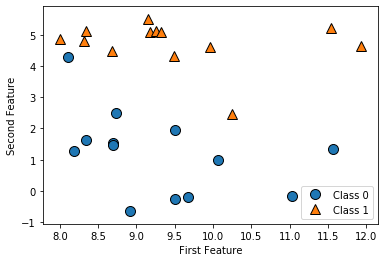

In [3]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')

# K neighbors regressor

Text(0, 0.5, 'Target')

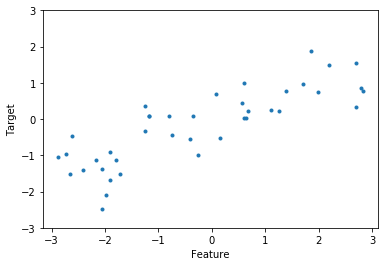

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, '.')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

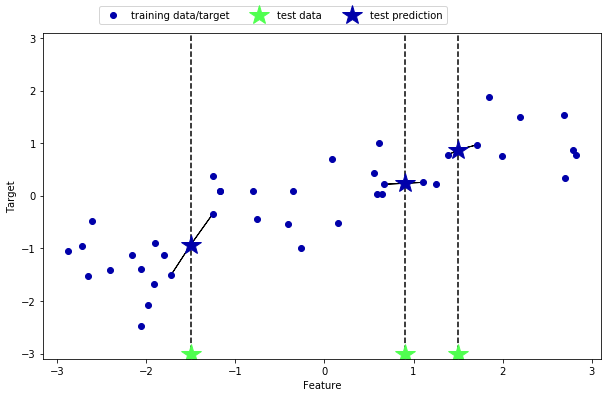

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

reg.predict(X_test)
reg.score(X_test, y_test)

0.8344172446249604

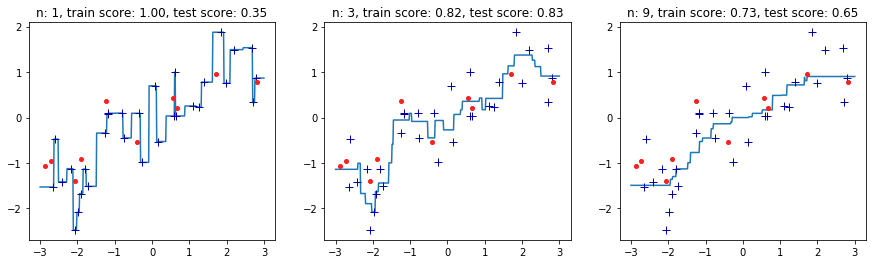

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 500).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '+', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test,'.', c=mglearn.cm2(1), markersize=8)
    ax.set_title('n: {}, train score: {:.2f}, test score: {:.2f}'.format (n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
 
    

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
print("Sample counts per class:\n", {n: v for n,  v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


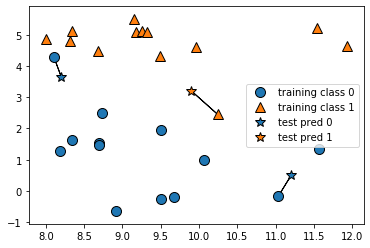

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\AA\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


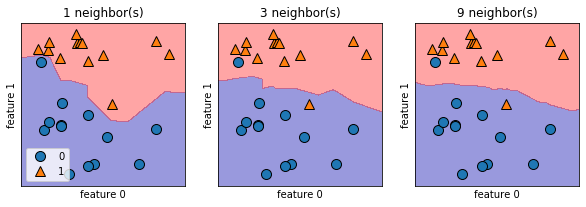

In [15]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip ([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

In [16]:
# As you can see on the above in the figure, using a single neighbor result in a decision boundary 
# that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary.

<function matplotlib.pyplot.legend(*args, **kwargs)>

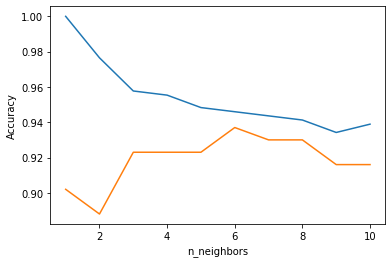

In [17]:
from sklearn.datasets import load_breast_cancer
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend

In [18]:
# As you see above, when considering 10 neighbors, the model is too simple, and performance is even worse. 
# The best performance is somewhere in the middle, using around six neighbors. 
# Still, it is good to keep the scale of the plot in mind. 
# The worst performance is around 88% accuracy, which might still be acceptable.